In [97]:
# Newton method with multiple roots

# This is totally inefficient and I do not care

In [98]:
import numpy as np, matplotlib.pylab as plt

# Initial conditions
n = 1000
xmin = -5
xmax = 5
tolerance = 1e-8
stepCount = 1
x = np.zeros(n)
ogx = np.zeros(n)
stepCountList = np.zeros(n)

# Desired function
def f(x):
    return (x**3) - 2*(x**2) - 11*x + 12

def df(x):
    return 3*(x**2) - 4*x - 11

# Determines whether the tangent root is within tolerance
# of the actual root.
def isInTolerance(x, tolerance):
    return abs(f(x)) <= tolerance

# Finds the next x value based on the current
def nextx (y):
    return y - (f(y)/df(y))

In [99]:
# Determine initial x values to test
#dx = xmax - xmin / n
x = np.linspace(xmax, xmin, n)
ogx = np.linspace(xmax, xmin, n)


#for i in range (0, n-1):
    #x[i] = xmin + i*dx
    #ogx[i] = x[i]


In [100]:
isUnique = True

for i in range (0, len(x)):
    stepCount = 1
    isUnique = True

    # Find new x lines until f(x) is within tolerance
    while (not isInTolerance(x[i], tolerance)):
        x[i] = nextx(x[i])
        stepCount += 1

    stepCountList[i] = stepCount
    
    # If root has not been found print results
    if (x[i] < xmax and x[i] > xmin):
        for j in range(0, i):
            if abs(x[i] - x[j]) < tolerance:
                isUnique = False
        
        if isUnique:
            print("Root is ", round(x[i], 3))
            print("Found root in ", stepCount, " steps.")

Root is  4.0
Found root in  6  steps.
Root is  -3.0
Found root in  16  steps.
Root is  1.0
Found root in  8  steps.


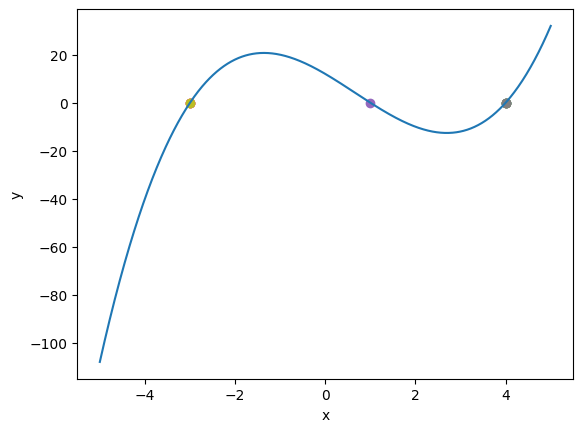

In [101]:
# Plot function and its roots

# Plot function
x_f = np.linspace(xmin, xmax, 1000)
y_f = f(x_f)
plt.plot(x_f, y_f)

# Plot roots
for i in range(0, len(x)):
    if not (abs(x[i] - x[i-1]) < tolerance): # plot unique roots
        plt.scatter(x[i], f(x[i]))

plt.xlabel("x")
plt.ylabel("y")
plt.show()

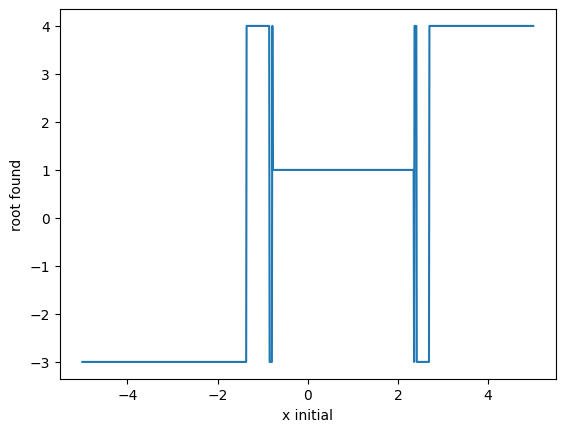

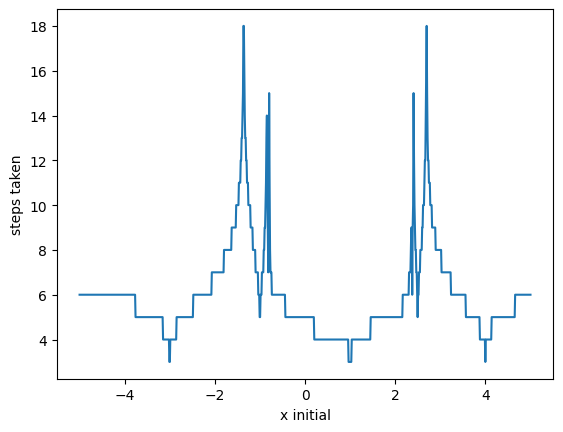

In [102]:
# Plot root found vs. x value
plt.plot(ogx, x)
plt.xlabel("x initial")
plt.ylabel("root found")
plt.show()

# Plot steps taken vs. x value
plt.plot(ogx, stepCountList)
plt.xlabel("x initial")
plt.ylabel("steps taken")
plt.show()